In [ ]:
!wget -q http://images.cocodataset.org/zips/train2017.zip
!wget -q http://images.cocodataset.org/zips/val2017.zip
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip train2017.zip val2017.zip annotations_trainval2017.zip

Archive:  train2017.zip
caution: filename not matched:  val2017.zip
caution: filename not matched:  annotations_trainval2017.zip


In [ ]:
!unzip -q -o train2017.zip

In [ ]:
!unzip -q -o val2017.zip

In [ ]:
!unzip -q -o annotations_trainval2017.zip

In [ ]:
!pip install cython
!pip install pycocotools

In [ ]:
from pycocotools.coco import COCO

anno_path = "/content/annotations/instances_train2017.json"
coco = COCO(anno_path)

loading annotations into memory...
Done (t=26.01s)
creating index...
index created!


In [ ]:
coco.getCatIds(catNms=["laptop", "cell phone"])

[73, 77]

In [ ]:
coco.loadCats([73,77])

[{'supercategory': 'electronic', 'id': 73, 'name': 'laptop'},
 {'supercategory': 'electronic', 'id': 77, 'name': 'cell phone'}]

In [ ]:
img_ids = coco.getImgIds(catIds=[73,77])

In [ ]:
len(img_ids)

721

In [ ]:
imgs = coco.loadImgs(img_ids)

In [ ]:
imgs[0]

{'license': 4,
 'file_name': '000000110593.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000110593.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-22 01:09:40',
 'flickr_url': 'http://farm3.staticflickr.com/2076/2052781232_2679e55264_z.jpg',
 'id': 110593}

In [ ]:
anno_ids = coco.getAnnIds(img_ids)

In [ ]:
annos = coco.loadAnns(anno_ids)

In [ ]:
annos[0]

{'segmentation': [[13.57,
   200.36,
   0.0,
   143.06,
   0.75,
   107.63,
   96.51,
   94.81,
   111.58,
   173.97,
   62.58,
   189.05]],
 'area': 8954.493500000002,
 'iscrowd': 0,
 'image_id': 110593,
 'bbox': [0.0, 94.81, 111.58, 105.55],
 'category_id': 72,
 'id': 30506}

In [ ]:
!pip install ultralyticsplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.1 MB/s eta

In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x.pt

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO("yolov8x.pt")

# set image
image = '/content/train2017/000000110593.jpg'

# perform inference
results = model(image)

# parse results
result = results[0]
boxes = result.boxes.xyxy # x1, y1, x2, y2
scores = result.boxes.conf
categories = result.boxes.cls
scores = result.probs # for classification models
masks = result.masks # for segmentation models

# show results on image
render = render_result(model=model, image=image, result=result)
render.show()


image 1/1 /content/train2017/000000110593.jpg: 448x640 1 person, 1 cup, 1 chair, 4 tvs, 1 laptop, 2 mouses, 1 remote, 3 keyboards, 2 cell phones, 5214.2ms
Speed: 16.1ms preprocess, 5214.2ms inference, 39.3ms postprocess per image at shape (1, 3, 448, 640)


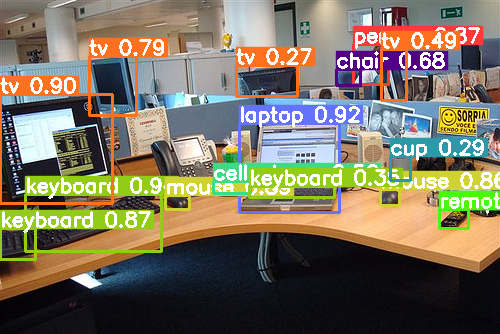

In [ ]:
render

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image02 = "/content/drive/MyDrive/未踏/prototype/demo.jpg"
results = model(image02)

# parse results
result = results[0]
boxes = result.boxes.xyxy # x1, y1, x2, y2
scores = result.boxes.conf
categories = result.boxes.cls
scores = result.probs # for classification models
masks = result.masks # for segmentation models

# show results on image
render = render_result(model=model, image=image02, result=result)
render

In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-seg.pt

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO("yolov8x-seg.pt")

image02 = "/content/drive/MyDrive/未踏/prototype/demo.jpg"
results = model(image02)

# parse results
result = results[0]
boxes = result.boxes.xyxy # x1, y1, x2, y2
scores = result.boxes.conf
categories = result.boxes.cls
scores = result.probs # for classification models
masks = result.masks # for segmentation models

# show results on image
render = render_result(model=model, image=image02, result=result)
render